In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df_customer=pd.read_csv('customer_churn.csv')
df_customer.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Converting string into integer
le = LabelEncoder()
cols = ['state','international plan','voice mail plan','churn']
for col in cols:
    df_customer[col] = le.fit_transform(df_customer[col])

In [5]:
df_customer=df_customer.drop(['phone number'],axis=1)

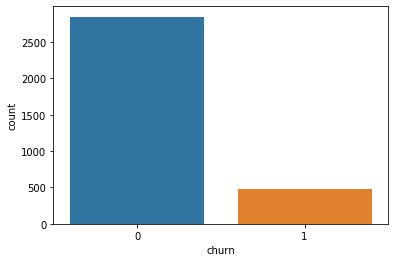

In [7]:
sns.countplot(x=df_customer['churn'],data=df_customer)

In [8]:
df_customer.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
df_customer_corr=df_customer.corr()
df_customer_corr
#Target attributes doesn't have strong relationship with feature attributes

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


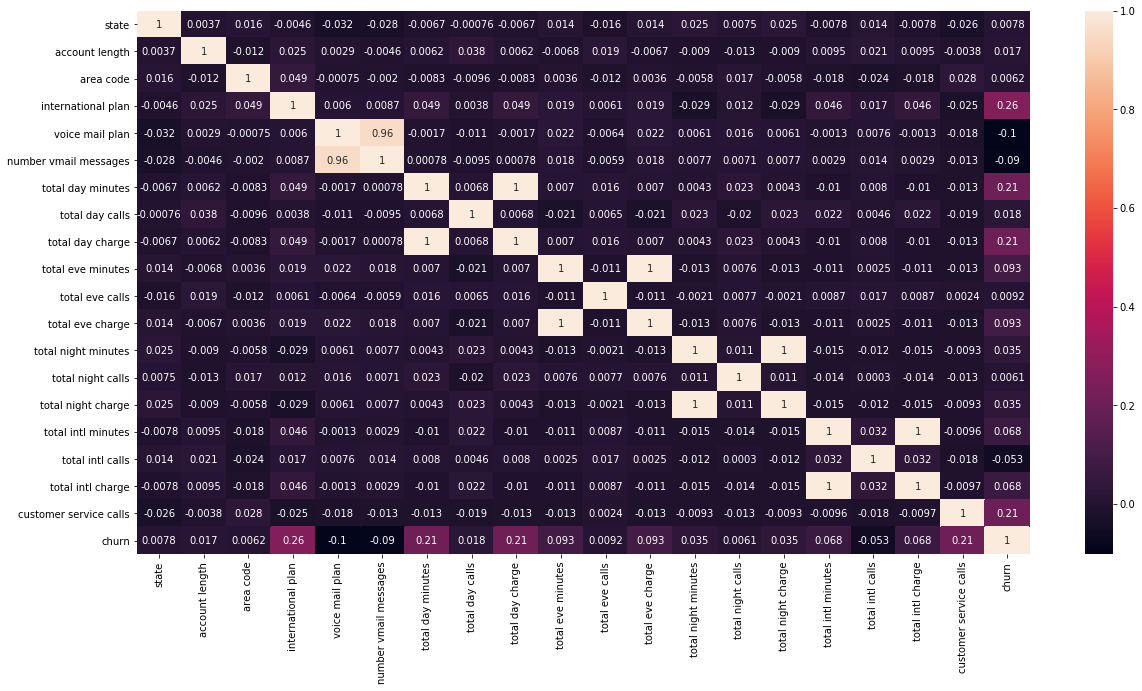

In [10]:
#Correlation between attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df_customer_corr, annot=True)
plt.show()

In [13]:
from scipy.stats import zscore
z_score=abs(zscore(df_customer))
print(df_customer.shape)
df_customer1_final=df_customer.loc[(z_score<3).all(axis=1)]                  
print(df_customer1_final.shape)
#to quantify the outliers

(3333, 20)
(2860, 20)


In [14]:
#Splitting of data
x = df_customer.iloc[:,:19]
y=df_customer['churn']

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [16]:
#Testing the models at random state 42 along with their accuracy score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
#After the testing several models,we have found that DecisionTreeClassifier is giving highest accuracy score at random state 42.

0.856071964017991
0.9250374812593704
0.889055472263868
0.8515742128935532


In [17]:
#Now we are checking, at what random state, DecisionTreeClassifier model will have highest accuracy score
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    dtr=DecisionTreeClassifier()
    dtr.fit(x_train,y_train)
    y_pred=dtr.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    print("accuracy score corresponding to random state: ",r_state," is: ",accuracy_score)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state
print()
print()
print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)
#At random state 43, DecisionTreeClassifier model is giving 0.9400299850074962 accuracy score

accuracy score corresponding to random state:  42  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  43  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  44  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  45  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  46  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  47  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  48  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  49  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  50  is:  <function accuracy_score at 0x000000EE4AE76798>
accuracy score corresponding to random state:  51  is:  <functio

In [18]:
#Cross Validation of DecisionTreeClassifier
cross_val_score(DecisionTreeClassifier(),x,y,cv=5,scoring='accuracy').mean()
#It is below the accuracy score, so it is acceptable model

0.9162927545236391

In [30]:
#Implementing DecisionTreeClassifier model at random state 43
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.20)
dtr=DecisionTreeClassifier()            
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
y_pred=dtr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9340329835082459


In [31]:
#Saving the model
import joblib
filename = 'Project20_model.pkl'
joblib.dump(dtr, filename)

['Project20_model.pkl']